In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline 
def confusion_matrix_heatmap(cm: np.ndarray, fsize:int=20, fmt:str=",",
                             cmap=None) -> plt.Figure:
  sns.set(font_scale=2) 
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(cm, annot=True, fmt=fmt, ax=ax, cmap=cmap, annot_kws={"size": fsize})
  ax.set_xlabel("Predicted Class")
  ax.set_ylabel("Actual Class")
  return fig


# Problem 1 (20 points) -- Logistic Regression
In the example given in class, using the Iris dataset, we predicted the species using only the petal length and width.  Repeat the study adding the sepal width and length (in addition to the petal width and length) as predictors.  Does classification accuracy improve with the additional predictors?

# https://umbc.webex.com/meet/dfenster

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
irisdata = load_iris()
X_train, y_train = irisdata.data, irisdata.target

A quick plot to get a sense of shape shows data is approximately normal with no significant outliers.  We will use a standard scaler here.

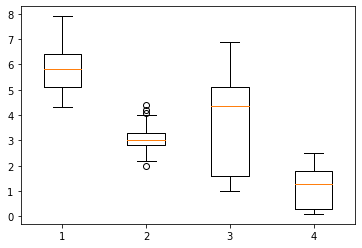

In [ ]:
plt.boxplot(X_train)
pass

As a baseline, we can first test our scoring accuracy with the first two parameters.

In [ ]:
irisdata.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

The petal length and width are represented in columns 2 and 3.

In [ ]:
from sklearn.preprocessing import StandardScaler
pipeline = make_pipeline(StandardScaler(), OneVsOneClassifier(LogisticRegression()))
y_pred = cross_val_predict(pipeline, X_train[:,2:], y_train, cv=10)
accuracy_score(y_train, y_pred)

0.96

We can now run the model with all the features included, using the same pipeline defined previously:

In [ ]:
from sklearn.preprocessing import StandardScaler
y_pred = cross_val_predict(pipeline, X_train, y_train, cv=10)
accuracy_score(y_train, y_pred)

0.9666666666666667

At most, we see a small improvement in classification accuracy from the additional two columns.  (Depending on the points selected for the training set, we may see no improvement.)  The implication is that petal width and length contain almost all of the available information in the dataset to identify the species.

In [ ]:
print(classification_report(y_train, y_pred, target_names=irisdata.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.96      0.94      0.95        50
   virginica       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



#Problem 2 - Gradient Descent

As shown in class, we can obtain the weights for a logistic regression model through gradient descent.  Our objective is to find a weight matrix $\mathbf{w}$ such that $\nabla\ell(\mathbf{w})\approx0$, where $\ell(\mathbf{w})$ is the log of the likelihood function applied to the given weights and:

$$
\nabla\ell(\mathbf{w}) = \begin{bmatrix}
   \frac{\partial\ell}{\partial w_1}(\mathbf{w}) \\
 \vdots \\
 \frac{\partial\ell}{\partial w_n}(\mathbf{w})
 \end{bmatrix}=\begin{bmatrix}
   \sum_i(y^{(i)}-\phi(\mathbf{w}\cdot\mathbf{x}^{(i)}))x_1^{(i)} \\
 \vdots \\
   \sum_i(y^{(i)}-\phi(\mathbf{w}\cdot\mathbf{x}^{(i)}))x_n^{(i)} \\
 \end{bmatrix}
$$

Recall that $\phi(z)$ is the logistic function, $(1+e^{-z})^{-1}$.

In the below code, you are given values of predictors $\mathbf{X}$ and targets $\mathbf{y}\in \{0,1\}$.  The classes are linearly separable.  Using the above formula, apply gradient descent to find values $\mathbf{w}$ that separate the classes.  Using the above formula and a learning rate $\eta=0.1$, apply gradient descent to find values for $\mathbf{w}$ that separate the classes.  Finally, using the code provided in the template, plot the decision boundary to visually demonstrate that the decision boundary separates the two classes.


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

X, y = make_blobs(50, 2, centers=[(-2,-2),(2,2)], random_state=42)
X = StandardScaler().fit_transform(X)
X = np.c_[np.ones(len(X)), X]
w = np.zeros(X.shape[1])

#Logistic function
phi = lambda z: 1/(1+np.exp(-z))

First, we define a function to compute $\partial\ell/\partial w_j$

In [ ]:
def dl_dwi(X, y, w, j):
  sum = 0
  for i in range(len(X)):
    yi = y[i]
    Xi = X[i]
    sum += (yi - phi(np.dot(w, Xi))) * Xi[j]
  return sum

We define a second function to compute $\nabla\ell$:

In [ ]:
from functools import partial

def dl_dw(X, y, w):
  dldwj = np.vectorize(partial(dl_dwi, X, y, w))
  return dldwj(np.arange(X.shape[1]))

# equivalent to:
#def dl_dw(X, y, w):
#  ret = np.zeros(X.shape[1])
#  for k in range(len(ret)):
#    ret[k] = dl_dwi(X, y, w, k)
#  return ret


We now apply gradient descent:

In [ ]:
w = np.zeros(X.shape[1])
norms = []
eta = 0.1
tol = 0.001
for k in range(50000):
  dldw = dl_dw(X, y, w)
  # We can break upon convergence
  if np.linalg.norm(dldw) < tol:
    break
  w = w - eta * -dldw
  norms.append(np.linalg.norm(dldw))
print(w)

[-0.99818013  9.86945964 10.38487401]


In [ ]:
np.linalg.norm(dldw)

0.0009999885800323625

While not required, we can plot $\lVert \nabla \ell \rVert$ for each epoch to show convergence.

Text(0.5, 0, 'Epoch')

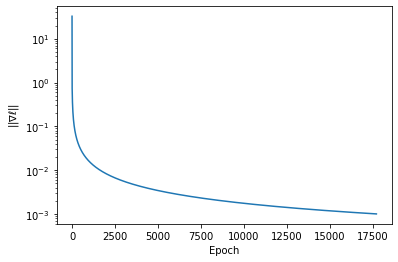

In [ ]:
fig, ax  = plt.subplots()
ax.plot(np.array(norms))
ax.set_yscale('log')
ax.set_ylabel(r'$||\nabla\ell||$')
ax.set_xlabel(r'Epoch')

Finally, using the code provided, we plot the prediction boundary.

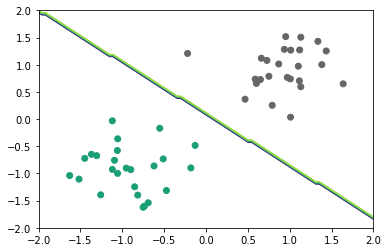

In [ ]:
gridsize = 100
gridshape = (gridsize, gridsize)
gridspace = np.linspace(-2, 2, gridsize)
x0m, x1m = np.meshgrid(gridspace, gridspace)
grid = np.c_[np.ones_like(x0m).ravel(), x0m.ravel(), x1m.ravel()]
y_pred = np.apply_along_axis(lambda x: phi(np.dot(w, x))>0.5, 1, grid)
plt.contour(x0m.reshape(gridshape), 
            x1m.reshape(gridshape), 
            y_pred.reshape(gridshape))
plt.scatter(X[:,1], X[:,2], c=y, cmap='Dark2')

#Problem 3 (60 points)

The OpenML dataset 'credit-g' classifies whether individuals are low credit risks based on 24 predictors [{Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science].

a. Load the 'credit-g' from OpenML and scale the data appropriately.  (A standard scalar will suffice for most fields, but several columns are categorical and will need to be one-hot encoded.)

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas_profiling

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (cross_val_score, cross_val_predict)
from sklearn.metrics import (classification_report, 
                             plot_confusion_matrix, 
                             confusion_matrix, f1_score,
                             precision_recall_curve)
from sklearn.model_selection import GridSearchCV

In [ ]:
d = fetch_openml('credit-g', as_frame=True, version=1)
df = d.data
y = (d.target == 'good').astype(int)

For scaling, convert categorical fields to OHE, and scale others as normal.

In [ ]:
catcolumns = list(df.dtypes[df.dtypes=='category'].index)
ct = ColumnTransformer(
    [
        ('ohe', OneHotEncoder(), catcolumns),
    ],
    remainder=StandardScaler()
)
X = ct.fit_transform(df)
X.shape

(1000, 61)

Quickly examine scaling and ensure no missing values:

False

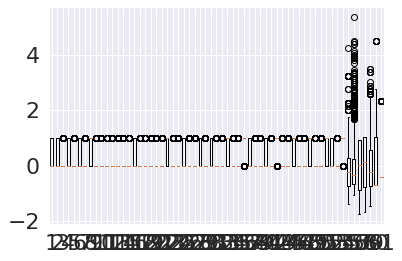

In [ ]:
plt.boxplot(X)
np.any(np.isnan(X))

Data appear reasonably scaled and there are no missing values.  We can proceed.

b. Split the scaled data into a test and training data set.  Allocate 80\% of records to the training data set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

c. Using the training data set, build a logistic regression classifier to predict the credit risk (the target variable in the OpenML dataset).  The regression classifier should use balanced class weights.

In [ ]:
cls = LogisticRegression(class_weight='balanced', max_iter=10000)

d. Generate a classification report and confusion matrix, and calculate the $F_1$ score.

Note: we must use `cross_val_predict` here to ensure we are not predicting from data used to train the model.

In [ ]:
y_pred = cross_val_predict(cls, X_train, y_train, cv=10)

Classification report:

In [ ]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.69      0.58       237
           1       0.84      0.71      0.77       563

    accuracy                           0.70       800
   macro avg       0.67      0.70      0.67       800
weighted avg       0.74      0.70      0.71       800



Confusion matrix:

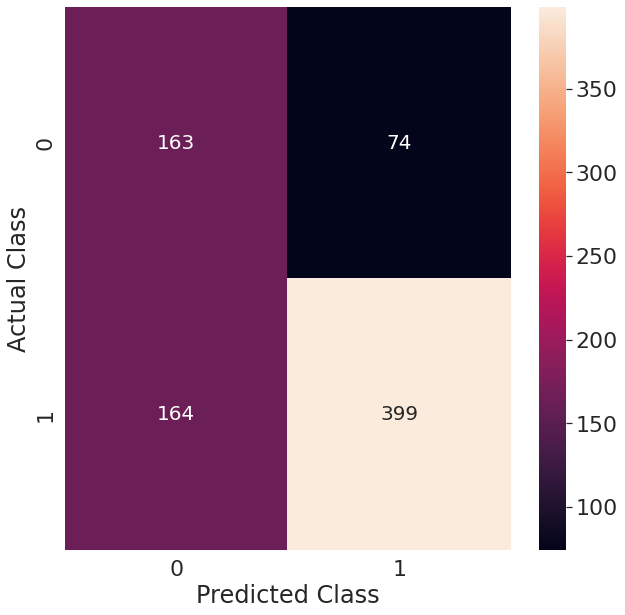

In [ ]:
confusion_matrix_heatmap(confusion_matrix(y_train, y_pred))
None

F1 score:

In [ ]:
f1_score(y_train, y_pred)

0.7702702702702703

e. Generate and plot the precision-recall curve for the model you built in the previous question.

In [ ]:
y_pred_score = cross_val_predict(cls, X_train, y_train, cv=10, 
                                 method = 'decision_function')
precision, recall, threshold = precision_recall_curve(y_train, y_pred_score)

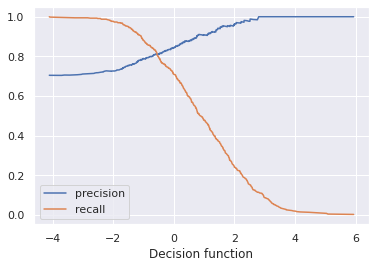

In [ ]:
fig, ax = plt.subplots()
ax.plot(threshold, precision[:-1], label='precision')
ax.plot(threshold, recall[:-1], label='recall')
ax.set_xlabel('Decision function')
ax.legend()

Text(0, 0.5, 'Recall')

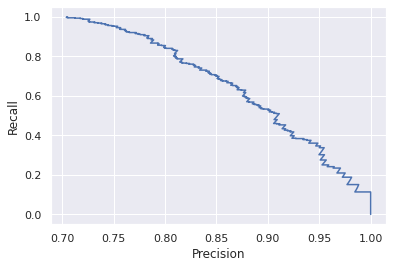

In [ ]:
fig, ax = plt.subplots()
ax.plot(precision, recall)
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')


f. Train the model on the complete training data set, and evaluate predictive validity on the test dataset.  Do you obtain a similar $F_1$ score for the test data set.

In [ ]:
cls.fit(X_train, y_train)
y_pred_test = cls.predict(X_test)
f1_score(y_test, y_pred_test)

0.78125

The f1 score is comparable to that obtained during cross-validation (0.77).  The estimator performs better than chance, but the model itself is mediocre.